In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [53]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)


healthorg_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates


In [54]:
# News_Outlets
df_path = glob.glob('./News_Outlets/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet', 'date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

news_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in news_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

news_df["date"] = dates

C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
# Individual
df_path = glob.glob('./Individual/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

# other datasets in ./Political/datasets_other_format.txt, dunno how to parse
"""file = open("./Political/datasets_other_format.txt")
other = file.readlines()
other = [name.rstrip() for name in other]"""

ind_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in ind_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

ind_df["date"] = dates

<p> Problem Datasets: </p>

<ul>
<li> kayleighmcenany </li>
<li> LeaderMcConnell </li>
<li> prager </li>
<li> RepMattGaetz </li>
<li> scrowder </li>
<li> tedcruz </li>
</ul>

In [56]:
"""# all fake tweets
claim_fake = glob.glob("./CoAID-master/*/ClaimFakeCOVID-19_tweets_hydrated.csv")
news_fake = glob.glob("./CoAID-master/*/NewsFakeCOVID-19_tweets_hydrated.csv")

fake_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_fake:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    fake_dfs.append(df)

for path in news_fake:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    fake_dfs.append(df)

fake_dfs = pd.concat(fake_dfs)

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)"""

In [101]:
# fake news

CMUID = pd.read_csv("./fake news/CMUID_hydrated.csv", index_col=0)
covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)

fake = [CMUID, covidFake, misinformation]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2019,12,31)]


In [102]:
"""# real tweets from CoAID-master
claim_real = glob.glob("./CoAID-master/*/ClaimRealCOVID-19_tweets_hydrated.csv")
news_real = glob.glob("./CoAID-master/*/NewsRealCOVID-19_tweets_hydrated.csv")

real_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    real_dfs.append(df)

for path in news_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    real_dfs.append(df)

real_dfs = pd.concat(real_dfs)

# fix date

dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)"""

'# real tweets from CoAID-master\nclaim_real = glob.glob("./CoAID-master/*/ClaimRealCOVID-19_tweets_hydrated.csv")\nnews_real = glob.glob("./CoAID-master/*/NewsRealCOVID-19_tweets_hydrated.csv")\n\nreal_dfs = []\n\n#  df = df[[\'name\',\'tweet\',\'date\', \'mentions\',\'urls\',\'photos\',\'replies_count\',\'retweets_count\',\'likes_count\',\'hashtags\',\'retweet\']]\n\n# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified\n\nfor path in claim_real:\n    df = pd.read_csv(path)\n    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hasht

In [103]:
# real tweets

realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
real_dfs = realTweets[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date

dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)

<ipython-input-103-54934387b424>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dfs["date"] = dates


'\nplt.figure(figsize=[30, 20])\nhealthorg_dates.sort_index().plot()\nind_dates.sort_index().plot()\nnews_dates.sort_index().plot()\nfake_tweets.sort_index().plot()\nreal_tweets.sort_index().plot()\nplt.legend(["healthorg", "ind", "news", "fake", "real"])\n'

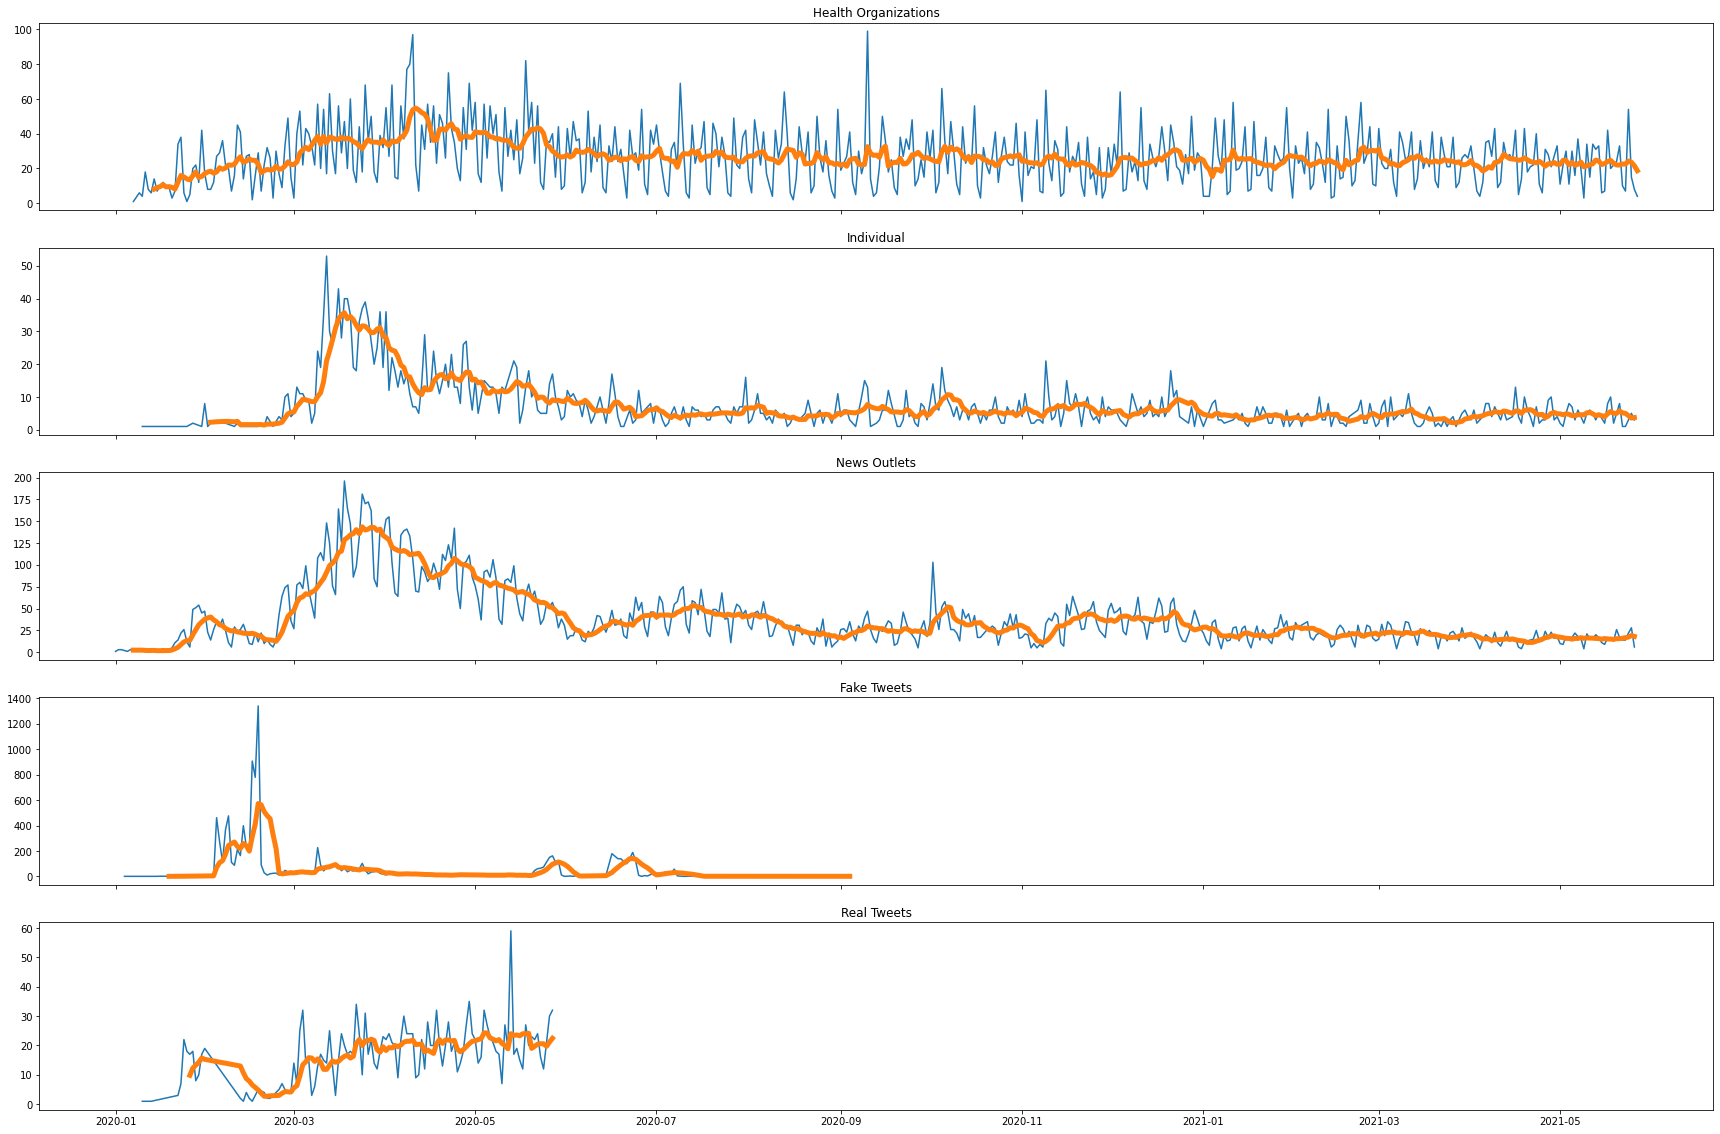

In [119]:
# plotting without weights

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(healthorg_dates.sort_index())
axes[0].plot(healthorg_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations")

axes[1].plot(ind_dates.sort_index())
axes[1].plot(ind_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Individual")

axes[2].plot(news_dates.sort_index())
axes[2].plot(news_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[2].set_title("News Outlets")

axes[3].plot(fake_tweets.sort_index())
axes[3].plot(fake_tweets.sort_index().rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Fake Tweets")

axes[4].plot(real_tweets.sort_index())
axes[4].plot(real_tweets.sort_index().rolling(window=7).mean(), linewidth=5)
axes[4].set_title("Real Tweets")

'''
plt.figure(figsize=[30, 20])
healthorg_dates.sort_index().plot()
ind_dates.sort_index().plot()
news_dates.sort_index().plot()
fake_tweets.sort_index().plot()
real_tweets.sort_index().plot()
plt.legend(["healthorg", "ind", "news", "fake", "real"])
'''

In [105]:
# ideas to move forward with
# --> moving average
# --> time series forecasting

In [106]:
# exploring engagement

healthorg_engagement = healthorg_df[["replies_count", "retweets_count", "likes_count"]]
stats_healthorg_engagement = healthorg_engagement.sum()
total_healthorg_engagement = stats_healthorg_engagement.sum()

weight_healthorg_engagement = stats_healthorg_engagement / total_healthorg_engagement

healthorg_reply_score = stats_healthorg_engagement[0] * weight_healthorg_engagement[0]
healthorg_retweet_score = stats_healthorg_engagement[1] * weight_healthorg_engagement[1]
healthorg_likes_score = stats_healthorg_engagement[2] * weight_healthorg_engagement[2]

healthorg_score = (healthorg_reply_score + healthorg_retweet_score + healthorg_likes_score) / 3

# get total followers
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

healthorg_engagement_score = healthorg_score / healthorg_followers
healthorg_engagement_score

# run by one of the mentors! --> Mark Ebden <3

0.07247743374161239

In [107]:
# exploring engagement, exclusing replies

healthorg_engagement = healthorg_df[["retweets_count", "likes_count"]]
stats_healthorg_engagement = healthorg_engagement.sum()
total_healthorg_engagement = stats_healthorg_engagement.sum()

weight_healthorg_engagement = stats_healthorg_engagement / total_healthorg_engagement

healthorg_retweet_score = stats_healthorg_engagement[0] * weight_healthorg_engagement[0]
healthorg_likes_score = stats_healthorg_engagement[1] * weight_healthorg_engagement[1]

healthorg_score = (healthorg_retweet_score + healthorg_likes_score) / 2

# get total followers
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

healthorg_engagement_score = healthorg_score / healthorg_followers
healthorg_engagement_score

# run by one of the mentors! --> Mark Ebden <3

0.11526648199081566

In [108]:
# exploring individual engagement

ind_engagement = ind_df[["replies_count", "retweets_count", "likes_count"]]
stats_ind_engagement = ind_engagement.sum()
total_ind_engagement = stats_ind_engagement.sum()

weight_ind_engagement = stats_ind_engagement / total_ind_engagement

ind_reply_score = stats_ind_engagement[0] * weight_ind_engagement[0]
ind_retweet_score = stats_ind_engagement[1] * weight_ind_engagement[1]
ind_likes_score = stats_ind_engagement[2] * weight_ind_engagement[2]

ind_score = (ind_reply_score + ind_retweet_score + ind_likes_score) / 3

# get total followers
file = pd.read_csv("ind_followers", usecols=[0, 1])
ind_followers = file["followers"].sum()

ind_engagement_score = ind_score / ind_followers
ind_engagement_score

0.0654288253981638

In [109]:
# exploring individual engagement, excluding replies

ind_engagement = ind_df[["retweets_count", "likes_count"]]
stats_ind_engagement = ind_engagement.sum()
total_ind_engagement = stats_ind_engagement.sum()

weight_ind_engagement = stats_ind_engagement / total_ind_engagement

ind_retweet_score = stats_ind_engagement[0] * weight_ind_engagement[0]
ind_likes_score = stats_ind_engagement[1] * weight_ind_engagement[1]

ind_score = (ind_retweet_score + ind_likes_score) / 2

# get total followers
file = pd.read_csv("ind_followers", usecols=[0, 1])
ind_followers = file["followers"].sum()

ind_engagement_score = ind_score / ind_followers
ind_engagement_score

0.10569285291419796

In [110]:
# exploring individual engagement

news_engagement = news_df[["replies_count", "retweets_count", "likes_count"]]
stats_news_engagement = news_engagement.sum()
total_news_engagement = stats_news_engagement.sum()

weight_news_engagement = stats_news_engagement / total_news_engagement

news_reply_score = stats_news_engagement[0] * weight_news_engagement[0]
news_retweet_score = stats_news_engagement[1] * weight_news_engagement[1]
news_likes_score = stats_news_engagement[2] * weight_news_engagement[2]

news_score = (news_reply_score + news_retweet_score + news_likes_score) / 3

# get total followers
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()

news_engagement_score = news_score / news_followers
news_engagement_score

0.04910814767411608

In [111]:
# exploring news engagement, excluding replies

news_engagement = news_df[["retweets_count", "likes_count"]]
stats_news_engagement = news_engagement.sum()
total_news_engagement = stats_news_engagement.sum()

weight_news_engagement = stats_news_engagement / total_news_engagement

news_retweet_score = stats_news_engagement[0] * weight_news_engagement[0]
news_likes_score = stats_news_engagement[1] * weight_news_engagement[1]

news_score = (news_retweet_score + news_likes_score) / 2

# get total followers
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()

news_engagement_score = news_score / news_followers
news_engagement_score

0.08087770317122325

In [112]:
# exploring fake engagement

fake_engagement = fake_dfs[["retweet_count", "favorite_count"]]
stats_fake_engagement = fake_engagement.sum()
total_fake_engagement = stats_fake_engagement.sum()

weight_fake_engagement = stats_fake_engagement / total_fake_engagement

fake_retweet_score = stats_fake_engagement[0] * weight_fake_engagement[0]
fake_likes_score = stats_fake_engagement[1] * weight_fake_engagement[1]

fake_score = (fake_retweet_score + fake_likes_score) / 2

# get total followers
fake_followers = fake_dfs["user_followers_count"].sum()

fake_engagement_score = fake_score / fake_followers
fake_engagement_score

0.0018267939305071578

In [113]:
# exploring real engagement

real_engagement = real_dfs[["retweet_count", "favorite_count"]]
stats_real_engagement = real_engagement.sum()
total_real_engagement = stats_real_engagement.sum()

weight_real_engagement = stats_real_engagement / total_real_engagement

real_retweet_score = stats_real_engagement[0] * weight_real_engagement[0]
real_likes_score = stats_real_engagement[1] * weight_real_engagement[1]

real_score = (real_retweet_score + real_likes_score) / 2

# get total followers
real_followers = real_dfs["user_followers_count"].sum()

real_engagement_score = real_score / real_followers
real_engagement_score

7.926174557084936e-05

Text(0.5, 1.0, 'Real Tweets')

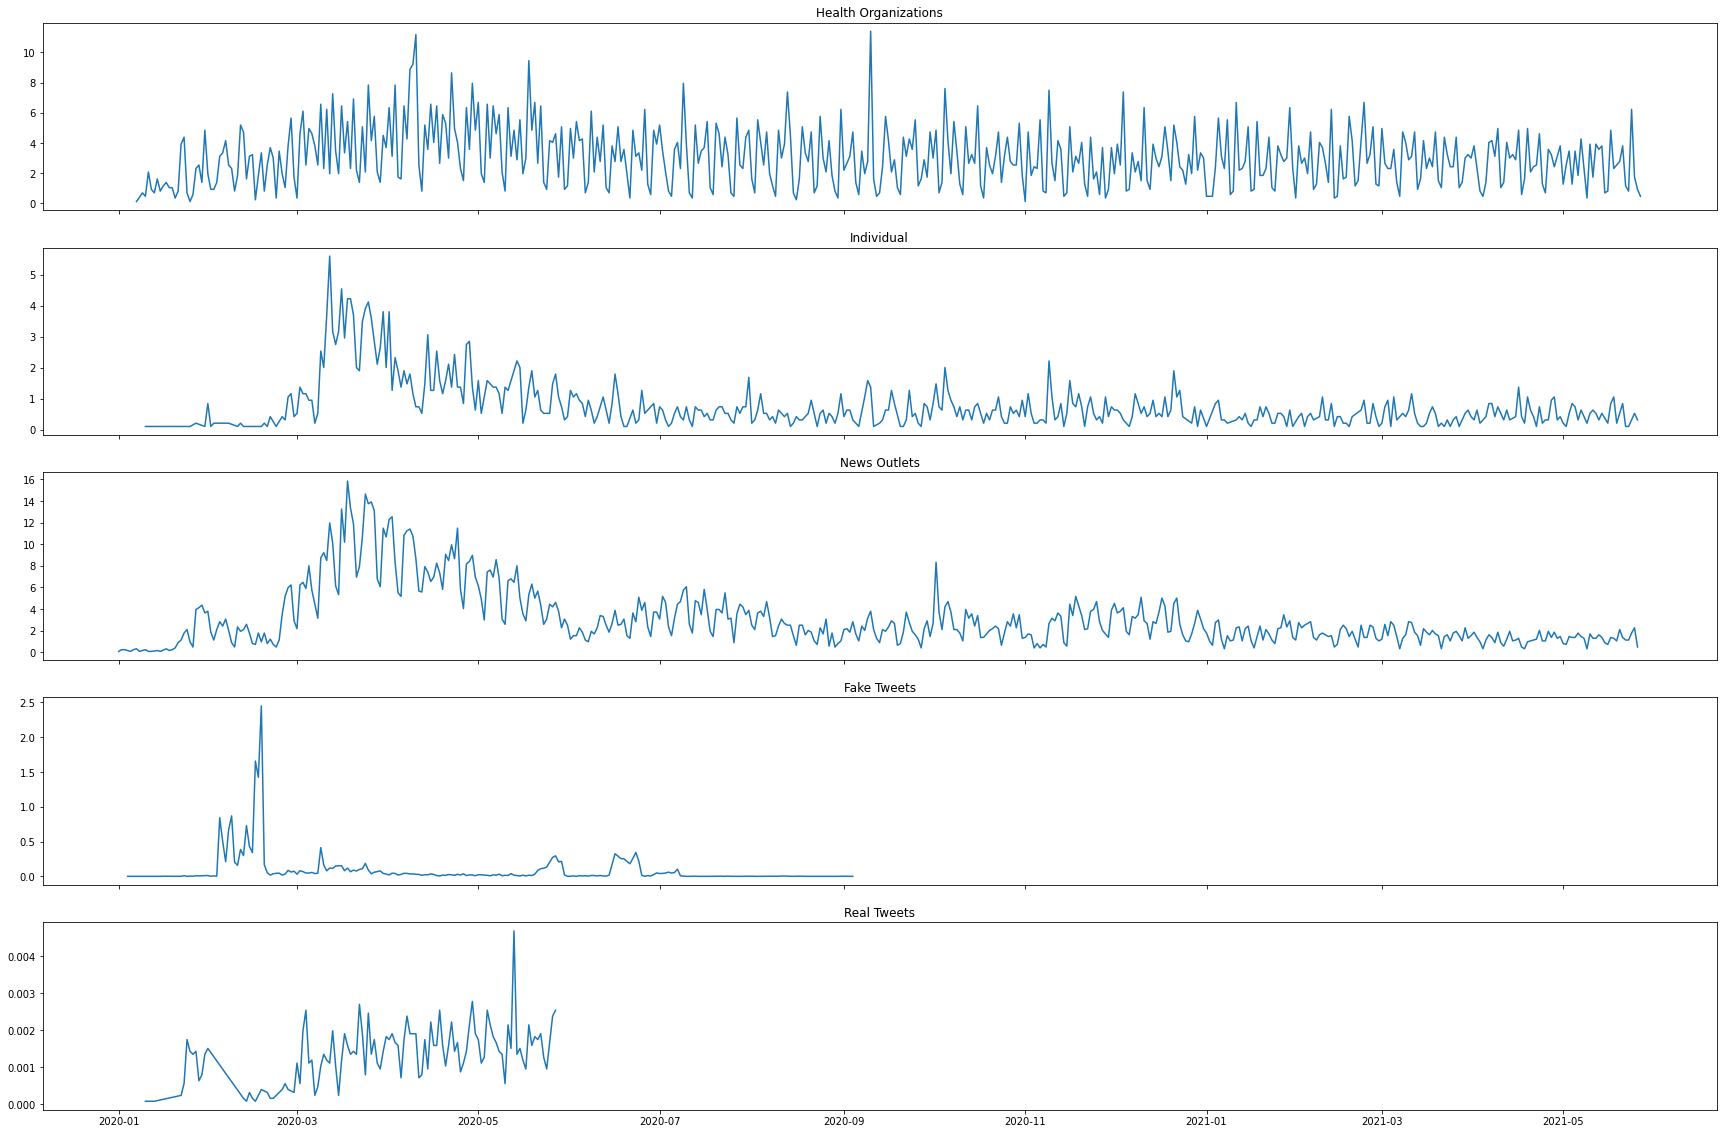

In [114]:
# plotting with weights

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts() * healthorg_engagement_score
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts() * ind_engagement_score
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts() * news_engagement_score

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts() * fake_engagement_score
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts() * real_engagement_score

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(healthorg_dates.sort_index())
axes[0].set_title("Health Organizations")
axes[1].plot(ind_dates.sort_index())
axes[1].set_title("Individual")
axes[2].plot(news_dates.sort_index())
axes[2].set_title("News Outlets")
axes[3].plot(fake_tweets.sort_index())
axes[3].set_title("Fake Tweets")
axes[4].plot(real_tweets.sort_index())
axes[4].set_title("Real Tweets")

In [115]:
# tweet count

health_count = healthorg_df["tweet"].count()
ind_count = ind_df["tweet"].count()
news_count = news_df["tweet"].count()

fake_count = fake_dfs["text"].count()
real_count = real_dfs["text"].count()

print("HealthOrg Tweets: \t{}\nIndividual Tweets: \t{}\nNews Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(health_count, ind_count, news_count, fake_count, real_count))

HealthOrg Tweets: 	13371
Individual Tweets: 	3385
News Outlet Tweets: 	19415
Fake Tweets:		11466
Real Tweets:		1931



In [116]:
# followers count

print("HealthOrg Followers: \t{}\nIndividual Followers: \t{}\nNews Outlet Followers: \t{}\nFake Followers:\t\t{}\nReal Followers:\t\t{}\n".format(healthorg_followers, ind_followers, news_followers, fake_followers, real_followers))

HealthOrg Followers: 	15681489
Individual Followers: 	177318491
News Outlet Followers: 	76552096
Fake Followers:		2601277553
Real Followers:		4270961479



In [117]:
real_dfs

,user_name,text,retweet_count,favorite_count,hashtags,user_followers_count,user_verified,date
coordinates,,,,,,,,
NaN,Prof Manohar K.,RT @WHO: Media briefing on #COVID19 with @DrTe...,919,0,COVID19,180,False,2020-04-29
NaN,World Health Organization (WHO),"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",56,125,COVID19,9381024,True,2020-05-11
NaN,World Health Organization (WHO),"""The Global Polio Eradication Initiative is wo...",42,114,COVID19 EndPolio,9381024,True,2020-04-03
NaN,PA Department of Health,All #COVID19 press conferences are available t...,21,30,COVID19,91616,True,2020-03-18
NaN,CDC,Current understanding is #COVID19 spreads most...,1723,1774,COVID19,3929272,True,2020-03-01
...,...,...,...,...,...,...,...,...
NaN,Department of Health and Social Care,If you have either:\r\n\r\na high temperature\...,168,164,StayHomeSaveLives COVID19,708488,True,2020-04-15
NaN,The Real News,"As COVID-19 spreads, experts call for the rele...",18,15,DecarcerateCOVID19 Coronavirus,77655,True,2020-03-24
NaN,Public Health England,We've published a range of #COVID19 guidance:\...,211,104,COVID19,485512,True,2020-03-19
